Each of the metrics give different indications about the insurance Firms

The one that I took as more important was GWP which indcates size and SCR Coverage Ratio which indicate risk

First, I wanted to see the relationship between each metric and size

As expected Total Asset, Total Liability and NWP showed a very clear correlation


Another view I wanted to have was to see plot of Size and Risk

It would be obvious we should be supervising Risky and Big Firms followed by other big firms as well as smaller ones which are risky


With this view, I clustered the data into four categories
- Big and Risky
- Big
- Small and Risky
- Neutral 

Explore if there is a relationship between this cluster and the other Metrics:

Given that we have now highlights based on category 

We can look at other metrics and highlight which firms that we want on our radar as well (last dashboard)

In [10]:
%%HTML
<div class='tableauPlaceholder' id='viz1701028335372' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;BoESupervisionChallenge-AnalysisReport&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='BoESupervisionChallenge-AnalysisReport&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;BoESupervisionChallenge-AnalysisReport&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1701028335372');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


C:\Users\Daddy\AppData\Local\Temp\ipykernel_10388\4134717916.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)
c:\Users\Daddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


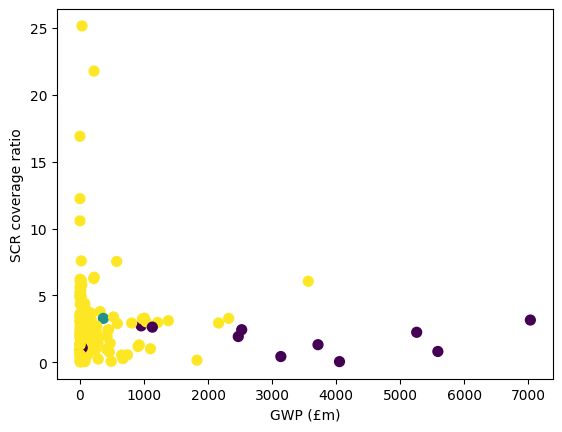

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('clean_dataset_2.csv')

# filter by year
df = df[df['Year End'] == 2020]

# Select the relevant metrics for clustering
metrics = df.select_dtypes(include=[np.number]).columns

# Extract the selected metrics
data = df[metrics]

# Handle missing values
data.fillna(data.mean(), inplace=True) 

# Standardize the data (important for K-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=3)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Print the clusters assigned to each firm
pd.set_option('display.max_rows', None)

df.to_csv('dataset_with_cluster.csv', encoding='utf-8', index=False)


fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(df['GWP (£m)'], df['SCR coverage ratio'], c=df['cluster'], s=50)

plt.xlabel('GWP (£m)')
plt.ylabel('SCR coverage ratio')
plt.show()